# The ScikitLearn.jl library

The Scikit-learn library is an open source machine learning library developed for the Python programming language, the first version of which dates back to 2010. It implements a large number of machine learning models, related to tasks such as classification, regression, clustering or dimensionality reduction. These models include Support Vector Machines (SVM), decision trees, random forests, or k-means. It is currently one of the most widely used libraries in the field of machine learning, due to the large number of functionalities it offers as well as its ease of use, since it provides a uniform interface for training and using models. The documentation for this library is available at https://scikit-learn.org/stable/.

For Julia, the ScikitLearn.jl library implements this interface and the algorithms contained in the scikit-learn library, supporting both Julia's own models and those of the scikit-learn library. The latter is done by means of the PyCall.jl library, which allows code written in Python to be executed from Julia in a transparent way for the user, who only needs to have ScikitLearn.jl installed. Documentation for this library can be found at https://scikitlearnjl.readthedocs.io/en/latest/.

As mentioned above, this library provides a uniform interface for training different models. This is reflected in the fact that the names of the functions for creating and training models will be the same regardless of the models to be developed. In the assignments of this course, in addition to ANNs, the following models available in the scikit-learn library will be used:

- Support Vector Machines (SVM)
- Decision trees
- kNN

In order to use these models, it is first necessary to import the library (using ScikitLearn, which must be previously installed with

```Julia
import Pkg;
Pkg.add("ScikitLearn"))
```

The scikit-learn library offers more than 100 types of  different models. To import the models to be used, you can use @sk_import. In this way, the following lines import respectively the first 3 models mentioned above that will be used in the practices of this subject:

```Julia
@sk_import svm: SVC
@sk_import tree: DecisionTreeClassifier
@sk_import neighbours: KNeighborsClassifier
```

When training a model, the first step is to generate it. This is done with a different function for each model. This function receives as parameters the model's own parameters. Below are 3 examples, one for each type of model that will be used in these course assignments:

```Julia
model = SVC(kernel="rbf", degree=3, gamma=2, C=1);
model = DecisionTreeClassifier(max_depth=4, random_state=1);
model = KNeighborsClassifier(3);
```

An explanation of the parameters accepted by each of these functions can be found in the library documentation. In the particular case of decision trees, as can be seen, one of these parameters is called `random_state`. This parameter controls the randomness in a particular part of the tree construction process, namely in the selection of features to split a node of the tree. The Scikit-Learn library uses a random number generator in this part, which is updated with each call, so that different calls to this function (together with its subsequent calls to the `fit!` function) to train the model will result in different models. To control the randomness of this process and make it deterministic, it is best to give it an integer value as shown in the example. Thus, the creation of a decision tree with a set of desired inputs and outputs and a given set of hyperparameters is a deterministic process. In general, it is more advisable to be able to control the randomness of the whole model development process (cross-validation, etc.) by means of a random seed that is set at the beginning of the whole process.

Once created, any of these models can be adjusted with the `fit!` function.

### Question

What does the fact that the name of this function ends in bang (!) indicate?

`The exclamation mark (!) at the end of the function name indicates that the function performs an in-place operation. This means it directly modifies the object it is applied to instead of creating a duplicate copy.`

`For instance, the fit! function is designed to update or adjust a ML model in place, altering the model rather than copying to a new one. This can be advantageous in terms of memory efficiency and performance since it avoids unnecessary data duplication.`

Contrary to the Flux library, where it was necessary to write the ANN training loop, in this library the loop is already implemented, and it is called automatically when the `fit!` function is executed. Therefore, it is not necessary to write the code for the training loop.

### Question

As in the case of ANNs, a loop is necessary for training several models. Where in the code (inside or outside the loop) will you need to create the model? Which models will need to be trained several times and which ones only once? Why?

`The models need to be created outside the loop for updating them inside the loop.`

`Deterministic models such as decision trees, k-nearest neighbors (KNN) and support vector machine (SVM) are typically trained only once, as their training processes yield consistent results for the same inputs and parameters. In contrast, non-deterministic models like artificial neural networks (ANNs), may exhibit variability in results due to factors like random weight initialization. ANNs require multiple training runs with varying initializations or data subsets. To enhance reliability, the outcomes from these different training runs can be aggregated, often by calculating statistical measures like the mean, providing a more stable representation of the model's performance.`

An example of the use of this function can be seen in the following line:

```Julia
fit!(model, trainingInputs, trainingTargets);
```

As can be seen, the first argument of this function is the model, the second is an array of inputs, and the third is a vector of desired outputs. It is important to realise that this parameter with the desired outputs is not an array like in the case of ANNs but a vector whose each element will correspond to the label associated to that pattern, and can be of any type: integer, string, etc. The main reason for this is that there are some models that do not accept desired outputs with the one-hot-encoding.

An important issue to consider is the layout of the data to be used. As has been shown in previous assignments, the patterns must be arranged in columns to train an ANN, being each row an attribute. Outside the world of ANNs, and therefore with the rest of the techniques to be used in this course, the patterns are usually assumed to be arranged in rows, and therefore each column in the input matrix corresponds to an attribute, being a much more intuitive way.

### Question

Which condition must the matrix of inputs and the vector of desired outputs passed as an argument to this function fulfil?

`The main condition is that they must be appropiately structured. If we have a inputs matrix of dimensions (m,n) where m is the number of samples and n the number of features or input variables, the vector of desired inputs must have dimensions (1, m), with the one output value for each input sample.`

`In summary, the matrix must have the same number of rows as the vector, so that there is exactly one output for each input. Since Julia represents vectors as column matrices, the condition can be expressed as requiring that both the matrix and the vector have the same number of rows.`

Finally, once the model has been trained, it can be used to make predictions. This is done by means of the predict function. An example of its use is shown below:

```Julia
testOutputs = predict(model, testInputs);
```

The model being used is an in-memory structure with different fields, and it can be very useful to look up the contents of these fields. To see which fields each model has, you can write the following:

```Julia
println(keys(model));
```

Depending on the type of model, there will be different fields. For example, for a kNN, the following fields, among others, could be consulted:

```Julia
model.n_neighbors
model.metric
model.weights
```

For an SVM, some other interesting fields could be the following:

```Julia
model.C
model.support_vectors_
model.support_
model.support_
```

In the case of an SVM, a particularly interesting function is `decision_function`, which returns the distances to the hyperplane of the passed patterns. This is useful, for example, to implement a "one-against-all" strategy to perform multi-class classification. An example of the use of this function is shown below:

```Julia
distances = decision_function(model, inputs);
```

### Question

In the case of using decision trees or kNN, a corresponding function is not necessary to perform the "one-against-all" strategy, why?

`This is because, unlike an algorithm such as SVM; DTs or kNNs are inherently capable of handling multi-class classification problems.`

`One-against-all is commonly used in ML models that are binary classifiers, such as support vector machines or logistic regression. Therefore, this technique is used to extend binary classifiers to handle multi-class problems by training separate binary classifiers for each class, reducing the multi-class problem to multiple binary classification tasks.`

However, the SVM implementation in the Scikit-Learn library already allows multi-class classification, so it is not necessary to use a "one-against-all" strategy for these cases.

Finally, it should be noted that these models usually receive pre-processed inputs and outputs, with the most common pre-processing being the normalisation already described in a previous assignment. Therefore, the developed normalisation functions should also be used on the data to be used by these models.

In this assignment, you are asked to develop a function called ```modelCrossValidation``` based on the functions developed in previous assignments that allows to validate models in the selected classification problem using the three techniques described here.

This function should perform cross-validation and use the metrics deemed most appropriate for the specific problem. This cross-validation can be done by modifying the code developed in the previous assignment.

This function must receive the following parameters:

- Algorithm to be trained, among the 4 used in this course, together with its parameter. The most important parameters to specify for each technique are:
    </br>
    
    - ANN
        - Architecture (number of hidden layers and number of neurons in each hidden layer) and transfer funtion in each layer. In "shallow" networks such as those used in this course, the transfer function has less impact, so a standard one, shuch as `tansig` or `logsig`, can be used.
        - Learning rate
        - Ratio of patterns used for validation
        - Number of consecutive iterations without improving the validation loss to stop the process
        - Number of times each ANN is trained.
        
        ### Question
        
        Why should a linear transfer function not be used for neurons in the hidden layers?
        
        `Using a linear transfer function in hidden layers, such as identity, should be avoided as it restricts the network's  ability to express itself. The composition of multiple layers remains linear when a linear transfer function is present, meaning that no matter the depth of the neural network, it can only carry out linear data relationships.`

        `For that reason, non-linear trasnfer functions are used like ReLu or sigmoid, since it allows to let the network free all of it power, enabling it to capture and represent complex and non-linear patterns in data, making it capable of learning.`
        
        ### Question
        
        The other models do not have the number of times to train them as a parameter. Why? If you train several times, Which statistical properties will the results of these trainings have?

        `As mentioned early, these models are deterministic and non-iterative. This means that, unlike neural networks, they don't need to be trained over epochs. These algorithms don't involve parameter updates over multiple iterations and don't use the concept of epochs.`
      
         `With these deterministic models, training multiple times on the same data will result in identical models. Always produce the same structure and rules when trained on same dataset with the same parameters, meaning that the standard deviation will always be 0. As a result, these type of algorithms, when performing a cross-validation technique, only need to be trained once for folding, instead of a number like neural networks.`

    </br>  
    
    - SVM
        - Kernel (and kernel-specific parameters)
        - C
        
    </br>  
    - Decision trees
        - Maximum tree depth
        
    </br>  
    - kNN
        - k (number of neighbours to be considered)

    </br>        
- Already standardised input and desired outputs matrices.
    </br>  

    - As stated above, the desired outputs must be indicated as a vector where each element is the label corresponding to each pattern (therefore, of type `Array{Any,1}`). In the case of ANN training, the desired outputs shall be encoded as done in previous assignments.
    
    ### Question
    
    Has it been necessary to standardise the desired outputs? Why?
    
    ```It is not necessary to standardize the desired outputs when training machine learning models. The desired outputs are typically categorical labels or continuous values that are not subject to the same scaling issues as input features. In classification problems, the output range is irrelevant because the output only determines in which class a sample belongs to, and is typically encoded using one-hot encoding. The output values are interpreted as probabilities for each class, and are already in the range [0,1]. Therefore, standardization is not necessary for the desired outputs in classification problems. However, in regression problems, it may be useful to standardize the output values to help the model deal with the multiple ranges that the output values can take.```
    
    </br>  
    - As previously described, in the case of using techniques such as SVM, decision trees or kNN, the one-hot-encoding configuration will not be used. In these cases, the `confusionMatrix` function developed in a previous assignment will be used to calculate the metrics, which accepts as input two vectors (outputs and desired outputs) of type `Array{Any,1}`.
    
    </br>  
- Cross-validation indices. It is important to note that, as in the previous assignment, the partitioning of the patterns in each fold need to be done outside this function, because this allows this same partitioning to be used then training other models. In this way, cross-validation is performed with the same data and the same partitions in all classes.

Since most of the code will be the same, do not develop 4 different functions, one for each model, but only one function. Inside it, at the time of generation the model in each fold, and depending on the model, the following changes should be made:

- If the model is an ANN, the desired outputs shall be encoded by means of the code developed in previous assignments. As this model is non-deterministic, it will be nevessary to make a new loop to train several ANNs, splitting the training data into training and validation (if validation set is used) and calling the function defined in previous assignments to create and traing an ANN.

- If the model is not an ANN, the code that trains the model shall be developed. This code shall be the same for each of the rematining 3 types of models (SVM, decision trees, and KNN), with the line where the model is called being the only difference.

In turn, this function should return, at least, the values for the selected metrics. Once this function has been developed, the experimental part of the assignment begins. The objective is to determine which model with a specific combination of hyperparameters offers the best results, for which the above function will be run for each of the 4 types of models, and for each model it will be run with different values in its hyperparameters.

- The results obtained should be documented in the report to be produced, for which it will be useful to show the results in tabular and/or graphical form.

- When it comes to displaying a confusion matrix in the report, an important question is which one to show given that a lot of trainings have been performed. The cross-validation technique does not generate a final model, but allows comparing different algorithms and configurations to choose the model or parameter configuration that returns the best results. Once chosen, it is necessary to train a "final" model from scratch by using all the patterns as the training set, that is, without separating patterns for testing. In this way, the performance of this model and configuration is expected to be slightly higher than that obtained through cross-validation, since more patterns have been used to train it. This is the final model that would be used in production, and from which a confusion matrix can be obtained.

In [1]:
using ScikitLearn;

@sk_import svm: SVC;
@sk_import tree: DecisionTreeClassifier;
@sk_import neighbors: KNeighborsClassifier;

In [2]:
include("functions.jl")

function modelCrossValidation(modelType::Symbol,
        modelHyperparameters::Dict,
        inputs::AbstractArray{<:Real,2},
        targets::AbstractArray{<:Any,1},
        crossValidationIndices::Array{Int64,1})

    # Check that the model type is supported
    @assert (in(modelType, [:ANN, :SVM, :kNN, :DecisionTree])) "Model type $(modelType) is not supported"
    
    # Train an ANN model
    if (modelType == :ANN)
        # Convert the targets to one-hot encoding for ANN training
        targets = oneHotEncoding(targets)
        
        # Train the ANN model using the trainClassANN function
        meanAcc, stdAcc = trainClassANN(modelHyperparameters["topology"], (inputs, targets), crossValidationIndices;
            maxEpochs=modelHyperparameters["maxEpochs"], minLoss=modelHyperparameters["minLoss"],
            learningRate=modelHyperparameters["learningRate"], repetitionsTraining=modelHyperparameters["repetitionsTraining"],
            validationRatio=modelHyperparameters["validationRatio"], maxEpochsVal=modelHyperparameters["maxEpochsVal"])
        
        return meanAcc, stdAcc
    end
         
    # Train a non-ANN model using k-fold cross-validation
    k = maximum(crossValidationIndices)
    testAccsK = zeros(k)
    
    # Train with k different splits
    for ki in 1:k
        
        # Create the desired model passing the corresponding hyperparameters
        if (modelType == :SVM)
            model = SVC(kernel=modelHyperparameters["kernel"], degree=modelHyperparameters["degree"], 
                gamma=modelHyperparameters["gamma"], C=modelHyperparameters["C"])
        elseif (modelType == :DecisionTree)
            model = DecisionTreeClassifier(max_depth=modelHyperparameters["depth"], random_state=1)
        else
            model = KNeighborsClassifier(modelHyperparameters["numNeighbours"])
        end

        # Use the patterns with no k index for training
        trainingInputs = inputs[crossValidationIndices .!= ki, :]
        trainingTargets = targets[crossValidationIndices .!= ki]

        # Use the patterns with the k index for testing
        testInputs = inputs[crossValidationIndices .== ki, :]
        testTargets = targets[crossValidationIndices .== ki]

        # Train the model
        model = fit!(model, trainingInputs, trainingTargets)

        # Compute the accuracy with the confusion matrix
        outputs = predict(model, testInputs)
        testAccsK[ki], _, _, _, _, _, _, _ = confusionMatrix(outputs, testTargets)
    end
    
    # Return the average and std of the metrics in the different k folds
    return mean(testAccsK), std(testAccsK)        
end;

In [3]:
using Statistics
include("functions.jl")


function create_model(modelType::Symbol, modelHyperparameters::Dict)
    if modelType == :SVM
        return SVC(kernel=modelHyperparameters["kernel"],
                   degree=modelHyperparameters["degree"],
                   gamma=modelHyperparameters["gamma"],
                   C=modelHyperparameters["C"])
    elseif modelType == :kNN
        return KNeighborsClassifier(modelHyperparameters["numNeighboors"])
    elseif modelType == :DecisionTree
        return DecisionTreeClassifier(max_depth=modelHyperparameters["maxDepth"])
    else
        error("Model type not supported")
    end
end

function train_and_predict(model, trainingInputs, trainingTargets, testInputs, testTargets)
    fit!(model, trainingInputs, vec(trainingTargets))
    testOutputs = predict(model, testInputs)
    return testOutputs
end

function train_ann_model(modelHyperparameters, trainingInputs, trainingTargets, testInputs, testTargets)
    testAccuraciesForEachRepetition = Array{Float64, 1}(undef, modelHyperparameters["repetitions"])

    for numTraining in 1:modelHyperparameters["repetitions"]
        if modelHyperparameters["validationRatio"] > 0.0
            (trainingIndexes, validationIndexes) = holdOut(size(trainingInputs, 1), modelHyperparameters["validationRatio"])
            
            validationInputs = trainingInputs[validationIndexes, :]
            validationTargets = trainingTargets[validationIndexes, :]
            trainingInputs = trainingInputs[trainingIndexes, :]
            trainingTargets = trainingTargets[trainingIndexes, :]
            
            model, _ = trainClassANN(modelHyperparameters["topology"], (trainingInputs, trainingTargets);
                                    validationDataset = (validationInputs, validationTargets),
                                    testDataset = (testInputs, testTargets),
                                    transferFunctions = modelHyperparameters["transferFunctions"],
                                    maxEpochs = modelHyperparameters["maxEpochs"],
                                    learningRate = modelHyperparameters["learningRate"],
                                    maxEpochsVal = modelHyperparameters["maxEpochsVal"])
        else
            model, _ = trainClassANN(modelHyperparameters["topology"], (trainingInputs, trainingTargets);
                                    testDataset = (testInputs, testTargets),
                                    transferFunctions = modelHyperparameters["transferFunctions"],
                                    maxEpochs = modelHyperparameters["maxEpochs"],
                                    learningRate = modelHyperparameters["learningRate"],
                                    maxEpochsVal = modelHyperparameters["maxEpochsVal"])
        end

        testOutputs = model(testInputs')'
        testAccuraciesForEachRepetition[numTraining], _, _, _, _, _, _, _ = confusionMatrix(testOutputs, testTargets)

    end

    return mean(testAccuraciesForEachRepetition)
end

function modelCrossValidation(modelType::Symbol, modelHyperparameters::Dict, inputs::AbstractArray{<:Real,2}, targets::AbstractArray{<:Any,1}, crossValidationIndices::Array{Int64,1})
    @assert(size(inputs, 1) == length(targets))
    @assert (in(modelType, [:ANN, :SVM, :kNN, :DecisionTree])) "Model type $(modelType) is not supported"
    
    kFolds = maximum(crossValidationIndices)
    testAccuracies = Array{Float64, 1}(undef, kFolds)

    if modelType == :ANN
        targets = oneHotEncoding(targets)
    end

    for numFold in 1:kFolds
        trainingInputs = inputs[crossValidationIndices .!= numFold, :]
        trainingTargets = targets[crossValidationIndices .!= numFold, :]
    
        testInputs = inputs[crossValidationIndices .== numFold, :]
        testTargets = targets[crossValidationIndices .== numFold, :]

        if modelType != :ANN
            model = create_model(modelType, modelHyperparameters)
            testOutputs = train_and_predict(model, trainingInputs, trainingTargets, testInputs, testTargets)

            testOutputs = oneHotEncoding(testOutputs, unique(testTargets))
            testTargets = oneHotEncoding(vec(testTargets))
            testAccuracy, _, _, _, _, _, _, _ = confusionMatrix(testOutputs, testTargets)
        else
            testAccuracy = train_ann_model(modelHyperparameters, trainingInputs, trainingTargets, testInputs, testTargets)
        end

        testAccuracies[numFold] = testAccuracy
    end

    return mean(testAccuracies), std(testAccuracies)
end


modelCrossValidation (generic function with 1 method)

In [4]:
include("functions.jl")

using DelimitedFiles
using Plots
using Random

Random.seed!(42)

dataset = readdlm("iris.data", ',')

learningRate = 0.01
numMaxEpochs = 100

inputs = convert(Array{Float32,2}, dataset[:,1:4])
targets = dataset[:, 5]
normalizeMinMax!(inputs)

testAccuracies = []
testAccuraciesStd = []

# Define number of cross-validation folds
kFolds = 10
crossValidationIndexes = crossvalidation(targets, kFolds)
topologies = [[4], [8], [2,4], [12,12]]
annParameters = Dict("modelType" => :ANN, "maxEpochs" => 1000,
    "learningRate" => 0.01, "maxEpochsVal" => 20,
    "repetitions" => 10, "validationRatio" => 0.2,
    "transferFunctions" => fill(σ, 2))

for topology in topologies
    annParameters["topology"] = topology
    testAccuracy, testAccuracyStd = modelCrossValidation(annParameters["modelType"], annParameters, inputs, targets, crossValidationIndexes)
    push!(testAccuracies, testAccuracy)
    push!(testAccuraciesStd, testAccuracyStd)
end

kernels = [("rbf", 0.6), ("rbf", 1), ("poly", 0.6), ("poly", 1)]
svmParameters = Dict("modelType" => :SVM, "degree" => 3, "gamma" => 2)

for kernel in kernels
    svmParameters["kernel"] = kernel[1]
    svmParameters["C"] = kernel[2]
    testAccuracy, testAccuracyStd = modelCrossValidation(svmParameters["modelType"], svmParameters, inputs, targets, crossValidationIndexes)
    push!(testAccuracies, testAccuracy)
    push!(testAccuraciesStd, testAccuracyStd)
end

knnParameters = Dict("modelType" => :kNN, "numNeighboors" => 7)
neighboors = [7, 11, 13, 17]

for k in neighboors
    knnParameters["numNeighboors"] = k
    testAccuracy, testAccuracyStd = modelCrossValidation(knnParameters["modelType"], knnParameters, inputs, targets, crossValidationIndexes)
    push!(testAccuracies, testAccuracy)
    push!(testAccuraciesStd, testAccuracyStd)
end

dtParameters = Dict("modelType" => :DecisionTree, "maxDepth" => 2)
depths = [5, 7, 13, 15]

for depth in depths
    dtParameters["maxDepth"] = depth
    testAccuracy, testAccuracyStd = modelCrossValidation(dtParameters["modelType"], dtParameters, inputs, targets, crossValidationIndexes)
    push!(testAccuracies, testAccuracy)
    push!(testAccuraciesStd, testAccuracyStd)
end

In [5]:
using Printf

models = ["ANN", "SVM", "knn", "DT"]
hyperparameters = vcat(topologies, kernels, neighboors, depths)
for i in 1:16
    
    @printf("%s, %s, %.2f, %.2f \n", models[ceil(Int, i/4)], hyperparameters[i], testAccuracies[i], testAccuraciesStd[i])
end

ANN, [4], 0.79, 0.08 
ANN, [8], 0.88, 0.08 
ANN, [2, 4], 0.77, 0.09 
ANN, [12, 12], 0.79, 0.10 
SVM, ("rbf", 0.6), 0.96, 0.06 
SVM, ("rbf", 1), 0.97, 0.05 
SVM, ("poly", 0.6), 0.95, 0.05 
SVM, ("poly", 1), 0.97, 0.06 
knn, 7, 0.97, 0.04 
knn, 11, 0.95, 0.05 
knn, 13, 0.97, 0.03 
knn, 17, 0.97, 0.03 
DT, 5, 0.94, 0.05 
DT, 7, 0.95, 0.05 
DT, 13, 0.96, 0.06 
DT, 15, 0.95, 0.05 


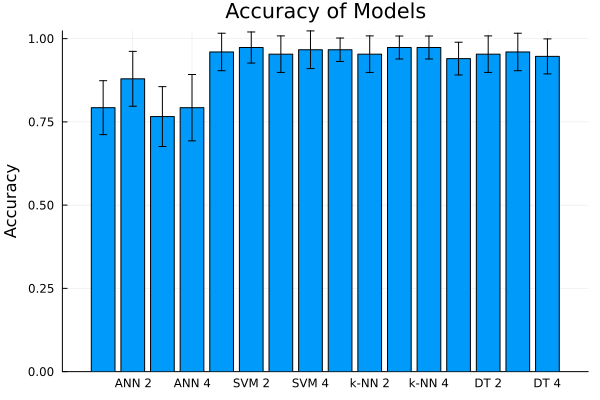

In [9]:
using Plots

# Definir la lista de nombres de modelos de manera eficiente
model_names = [string("ANN ", i) for i in 1:4] ∪ [string("SVM ", i) for i in 1:4] ∪ [string("k-NN ", i) for i in 1:4] ∪ [string("DT ", i) for i in 1:4]

# Crear un gráfico de barras con barras de error
bar(model_names, testAccuracies, yerr=testAccuraciesStd, legend=false, ylabel="Accuracy", title="Accuracy of Models")

# Mostrar el gráfico
plot!()


### Report results

#### ANN

In [10]:
targetsOneHotEncoded = oneHotEncoding(targets)
(trainIndex, validationIndex, testIndex) = holdOut(size(inputs, 1), 0.2, 0.2)
trainingInputs = inputs[trainIndex, :]
testInputs = inputs[testIndex, :]
trainingTargets = targetsOneHotEncoded[trainIndex, :]
testTargets = targetsOneHotEncoded[testIndex, :]
validationInputs = inputs[validationIndex, :]
validationTargets = targetsOneHotEncoded[validationIndex, :]

model, _ = trainClassANN([8], (trainingInputs, trainingTargets);
            validationDataset = (validationInputs, validationTargets),
            testDataset = (testInputs, testTargets),
            transferFunctions =fill(σ, 2),
            maxEpochs = 1000,
            learningRate = 0.01,
            maxEpochsVal = 20)

testOutputs = model(testInputs')'

confusionMatrix(testOutputs, testTargets)

(accuracy = 0.9666666666666667, errorRate = 0.033333333333333326, sensitivity = 0.9666666666666666, specificity = 0.9666666666666668, precision = 0.96875, negative_predictive_value = 0.9902777777777777, fScore = 0.9659222497932175, confusion_matrix = [8 0 0; 0 15 0; 0 1 6])

#### SVM

In [11]:
svm = SVC(kernel="rbf", C = 1, degree = 3, gamma = 2)
knn = KNeighborsClassifier(13)
dt = DecisionTreeClassifier(max_depth = 13)

function train_sklearn_model(model)    
    (trainIndex, testIndex) = holdOut(size(inputs, 1), 0.2)
    trainingInputs = inputs[trainIndex, :]
    testInputs = inputs[testIndex, :]
    trainingTargets = targets[trainIndex, :]
    testTargets = targets[testIndex, :]
    
    fit!(model, trainingInputs, vec(trainingTargets))
    
    testOutputs = oneHotEncoding(predict(model, testInputs), unique(testTargets))
    testTargets = oneHotEncoding(vec(testTargets))
    
    return confusionMatrix(testOutputs, testTargets)
end

println("SVM => $(train_sklearn_model(svm))")
println("kNN => $(train_sklearn_model(knn))")
println("DecisionTree => $(train_sklearn_model(dt))")

SVM => (accuracy = 0.9666666666666667, errorRate = 0.033333333333333326, sensitivity = 0.9666666666666668, specificity = 0.9745098039215685, precision = 0.9690476190476189, negative_predictive_value = 0.9841269841269842, fScore = 0.9664067576348279, confusion_matrix = [13 0 0; 0 7 0; 1 0 9])
kNN => (accuracy = 1.0, errorRate = 0.0, sensitivity = 1.0, specificity = 1.0, precision = 1.0, negative_predictive_value = 1.0, fScore = 1.0, confusion_matrix = [8 0 0; 0 11 0; 0 0 11])
DecisionTree => (accuracy = 0.8666666666666667, errorRate = 0.1333333333333333, sensitivity = 0.8666666666666666, specificity = 0.9357142857142856, precision = 0.8738095238095238, negative_predictive_value = 0.9423510466988727, fScore = 0.8643939393939394, confusion_matrix = [9 0 1; 0 11 0; 3 0 6])


### Learn Julia

In this assignment, it is necessary to pass parameters which are dependent on the model. To do this, the simplest way is to create a variable of type Dictionary (actually the type is `Dict`) which works in a similar way to Python. For example, to specify the parameters of an SVM, you could create a variable as follows:

```Julia
parameters = Dict("kernel" => "rbf", "degree" => 3, "gamma" => 2, "C" => 1);
```

Another way of defining such a variable could be the following:

```Julia
parameters = Dict();

parameters["kernel"] = "rbf";
parameters["kernelDegree"] = 3;
parameters["kernelGamma"] = 2;
parameters["C"] = 1;
```

Once inside the function to be developed, the model parameters can be used to create the model objet as follows:

```Julia
model = SVC(kernel=parameters["kernel"], 
    degree=parameters["kernelDegree"], 
    gamma=parameters["kernelGamma"], 
    C=parameters["C"]);
```

In the same way, something similar could be done for decision trees and kNN.

Another type of Julia that may be interesting for this assignment is the `Symbol` type. An object of this type can be any symbol you want, simply by typing its name after a colon (":"). In this practice, you can use it to indicate which model you want to train, for example `:ANN`, `:SVM`, `:DecisionTree` or `:kNN`.